In [54]:
import pandas as pd

import numpy as np

from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [2]:
dataset = load_breast_cancer()

In [3]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### Préparation des données 

In [4]:
X = dataset.data

In [5]:
X.shape

(569, 30)

In [6]:
y = dataset.target

In [7]:
y.shape

(569,)

### Partionnement des données 

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
# Stratify permet de garder le meme nombre de 0 et de 1 dans le dataset.

In [46]:
X_train.shape

(455, 30)

In [49]:
y_train.shape

(455,)

In [50]:
X_test.shape

(114, 30)

In [52]:
y_test.shape

(114,)

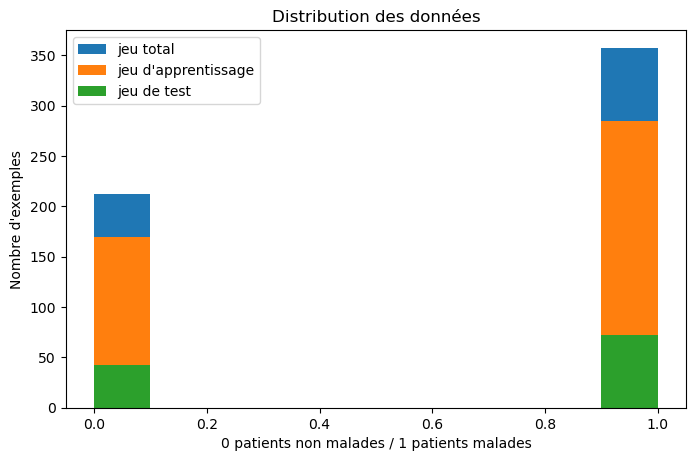

In [48]:
plt.figure(figsize=(8,5), dpi=100)
plt.title("Distribution des données")
plt.hist(y, label="jeu total")
plt.hist(y_train, label="jeu d'apprentissage")
plt.hist(y_test, label="jeu de test")
plt.xlabel("0 patients non malades / 1 patients malades")
plt.ylabel("Nombre d'exemples")
plt.legend()
plt.show()

## Features Scaling

In [55]:
#Par default commencer par le standard scaler. 
scaler = StandardScaler() 

In [56]:
scaler.fit(X_train)

StandardScaler()

In [57]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

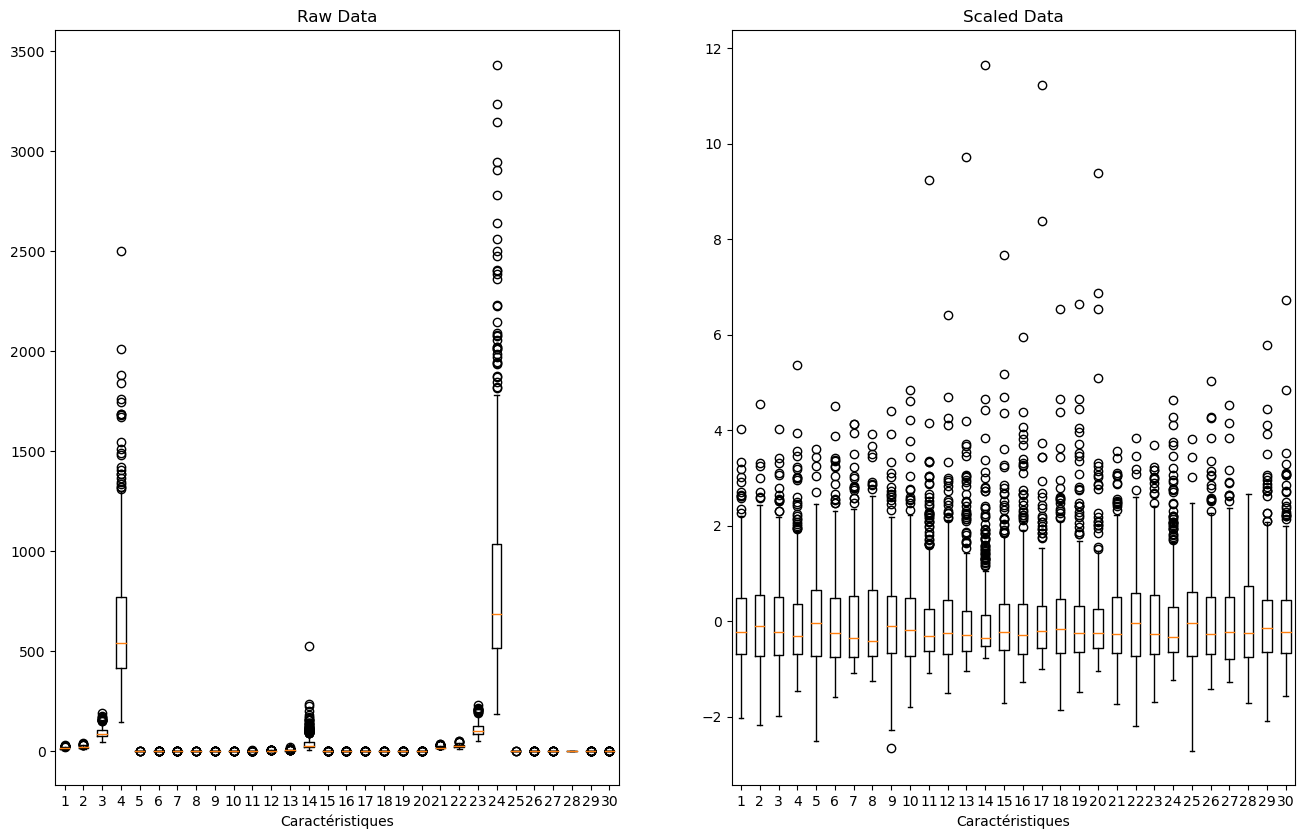

In [59]:
plt.figure(figsize=(16, 10), dpi=100)

plt.subplot(1, 2, 1)
plt.title('Raw Data')
plt.boxplot(X_train)
#plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30], labels=dataset['feature_names'])
plt.xlabel('Caractéristiques')

plt.subplot(1, 2, 2)
plt.title('Scaled Data')
plt.boxplot(scaled_X_train)
#plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30], labels=dataset['feature_names'])
plt.xlabel('Caractéristiques')

plt.show()

## Entrainement du modèle 

In [66]:
hyperparameters = {'hidden_layer_sizes': [(1,), (3,), (5,), (7,)], 'activation': ['logistic', 'tanh', 'relu', 'identity']}

In [67]:
model = MLPClassifier(hidden_layer_sizes=(10,3,3), activation='relu', solver='lbfgs', alpha=0.0001, max_iter=10000, random_state=0, max_fun=15000)

In [68]:
gridSearchCV = GridSearchCV(model,
                            hyperparameters,
                            n_jobs=-1,
                            refit=True,
                            cv=3,
                            return_train_score=True)

gridSearchCV.fit(scaled_X_train, y_train)

GridSearchCV(cv=3,
             estimator=MLPClassifier(hidden_layer_sizes=(10, 3, 3),
                                     max_iter=10000, random_state=0,
                                     solver='lbfgs'),
             n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu', 'identity'],
                         'hidden_layer_sizes': [(1,), (3,), (5,), (7,)]},
             return_train_score=True)

In [69]:
gridSearchCV.best_params_

# hidden_layer_sizes (x,) nous donne le nombre de neuromes idéal à paramétrer dans le modèle. 

{'activation': 'tanh', 'hidden_layer_sizes': (1,)}

## Evaluation des performances du modèle sur le jeu d'apprentissage

In [70]:
from sklearn.model_selection import cross_val_score

acc = cross_val_score(model, X, y, cv=5);

for score in acc:
    print(f'Accuracy = {score}')

Accuracy = 0.9298245614035088
Accuracy = 0.9473684210526315
Accuracy = 0.9824561403508771
Accuracy = 0.956140350877193
Accuracy = 0.9557522123893806


## Fit le modèle avec le meilleur paramétrage possible

In [21]:
y_predict_train = gridSearchCV.best_estimator_.predict(scaled_X_train)

In [22]:
MSE_train = mean_squared_error(y_train, y_predict_train)

In [23]:
print("L'erreur quadratique moyenne vaut :", MSE_train)

L'erreur quadratique moyenne vaut : 0.004395604395604396


## Coéfficient de détermination 

In [24]:
R_squared_train = 1.0 - (np.sum((y_train - y_predict_train)**2) / np.sum((y_train - np.mean(y_train))**2))

In [25]:
print("Le coefficient de détermination vaut :", R_squared_train)

Le coefficient de détermination vaut : 0.9811726734803657


## Droite de performance du modèle

In [26]:
a_train, b_train = np.polyfit(y_train, y_predict_train, 1)

In [27]:
print("Le coefficient directeur de la droite vaut :", a_train.round(2))

Le coefficient directeur de la droite vaut : 0.99


In [28]:
print("L'ordonnée à l'origine de la droite vaut:", b_train.round(2))

L'ordonnée à l'origine de la droite vaut: 0.01


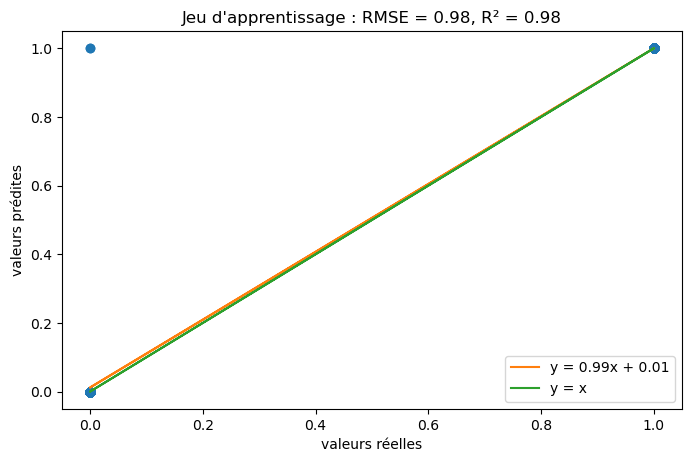

In [31]:
plt.figure(figsize=(8,5), dpi=100)
plt.title("Jeu d'apprentissage : RMSE = " + str(R_squared_train.round(2)) + ", R² = " + str(R_squared_train.round(2)))
plt.plot(y_train, y_predict_train, 'o')
plt.plot(y_train, a_train * y_train + b_train, label="y = " + str(a_train.round(2)) + "x + " + str(b_train.round(2)))
plt.plot(y_train, y_train, label="y = x")
plt.xlabel("valeurs réelles")
plt.ylabel("valeurs prédites")
plt.legend()
plt.show()

## Evaluation modèle sur le jeu de test 

In [32]:
y_predict_test = gridSearchCV.best_estimator_.predict(scaled_X_test)

In [33]:
R_squared_test = 1.0 - (np.sum((y_test - y_predict_test)**2) / np.sum((y_test - np.mean(y_test))**2))

In [34]:
print("Le coefficient de détermination vaut :", R_squared_test.round(4))

Le coefficient de détermination vaut : 0.9253


## Droite de régression

In [35]:
a_test, b_test = np.polyfit(y_test, y_predict_test, 1)

In [36]:
print("Le coefficient directeur de la droite vaut :", a_test.round(2))

Le coefficient directeur de la droite vaut : 0.96


In [37]:
print("L'ordonnée à l'origine de la droite vaut:", b_test.round(2))

L'ordonnée à l'origine de la droite vaut: 0.02


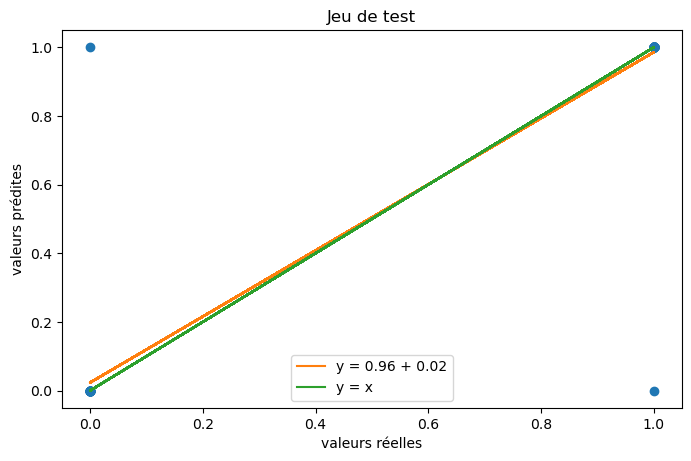

In [38]:
plt.figure(figsize=(8,5), dpi=100)
plt.title("Jeu de test")
plt.plot(y_test, y_predict_test, 'o')
plt.plot(y_test, a_test * y_test + b_test, label="y = " + str(a_test.round(2)) + " + " + str(b_test.round(2)))
plt.plot(y_test, y_test, label="y = x")
plt.xlabel("valeurs réelles")
plt.ylabel("valeurs prédites")
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, y_predict_test) * 100
test_acc

98.24561403508771

In [71]:
from sklearn.model_selection import learning_curve

## Courbe de performance du modèle en fonction du nombre de données / Quand nous sommes sur un plateau cela signifie que meme si on rajoute des données le modèle ne s'améliorera plus. 

In [72]:
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

In [73]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

In [74]:
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

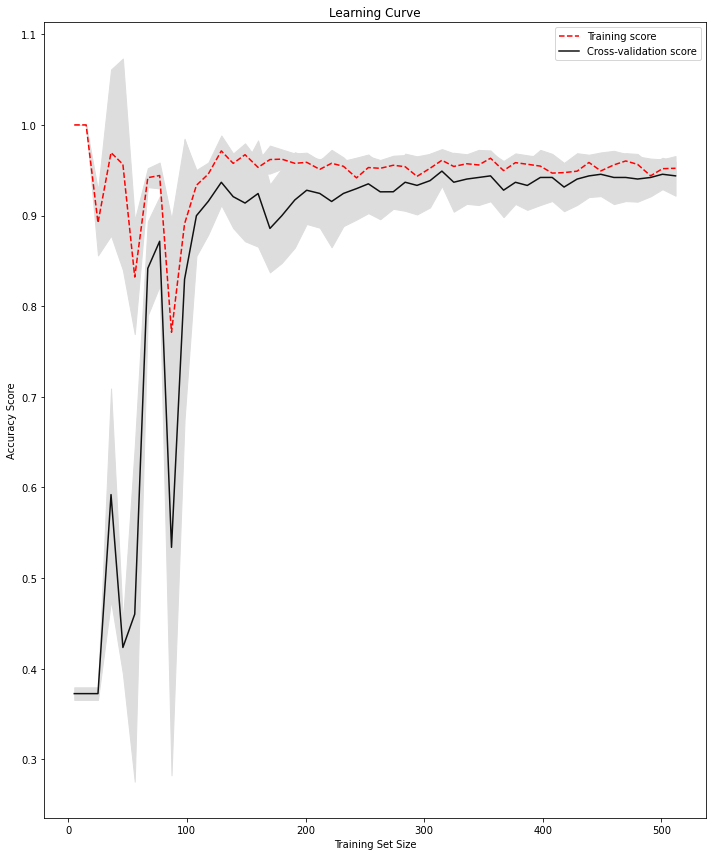

In [75]:
plt.subplots(1, figsize=(10,12))
plt.plot(train_sizes, train_mean, '--', color="red",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()